# Tổng quan đề tài

Bạn nhận được Cơ sở dữ liệu bóng đá châu Âu có hơn 25.000 trận đấu và hơn 10.000 cầu thủ cho các mùa bóng đá chuyên nghiệp châu Âu từ 2008 đến 2016. Mục tiêu là bạn xem qua cơ sở dữ liệu này và thực hiện phân tích, bao gồm một số bước khám phá dữ liệu, thống kê cơ bản và sau đó bạn hình dung kết quả. Để hoàn thành tất cả các bước, bạn cần truy vấn dữ liệu trong cơ sở dữ liệu bằng cách sử dụng câu lệnh SQL. Đề tài này thực hành bạn viết lệnh SQL để kéo dữ liệu về và trích xuất nó.

# Mô tả dữ liệu

Cơ sở dữ liệu bóng đá châu Âu này có hơn 25.000 trận đấu và hơn 10.000 cầu thủ cho các mùa bóng đá chuyên nghiệp châu Âu từ 2008 đến 2016, 11 quốc gia châu Âu với chức vô địch dẫn đầu. Các thuộc tính của Người chơi và Đội có nguồn gốc từ loạt trò chơi video FIFA của EA Sports, bao gồm các bản cập nhật hàng tuần.

# Gọi thư viện Python

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

## Câu hỏi 1: Kết nối tới cơ sở dữ liệu và truy vấn thông tin của tất cả các bảng

Đọc https://docs.python.org/2/library/sqlite3.html

Học viên chỉ sử dụng câu lệnh SQL để truy vấn kế quả, không được sử dụng câu lệnh Pandas để tính toán ra kết quả.

In [2]:
# Kết nối với cơ sở dữ liệu
# ĐIỀN CODE VÀO ĐÂY
conn = sqlite3.connect('database.sqlite')

# Lấy thông tin của tất cả bảng
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## Câu hỏi 2: Liệt kê các quốc gia có trong dữ liệu bảng "Country"

In [3]:
# ĐIỀN CODE VÀO ĐÂY
countrys = pd.read_sql("SELECT * FROM Country", conn)
countrys

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


## Câu hỏi 3: Liệt kê các giải đấu trong bảng "League"

In [4]:
# ĐIỀN CODE VÀO ĐÂY
leagues = pd.read_sql("SELECT * FROM League", conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


## Câu hỏi 4: Liệt kê các giải đấu và thông tin quốc gia của từng league

Bảng League có quan hệ với bảng Country qua khóa country_id.

In [5]:
# ĐIỀN CODE VÀO ĐÂY
results = pd.read_sql(
    '''
        SELECT ct.name as 'Country', lg.name as 'Name of league'
        FROM Country ct
        INNER JOIN League lg on lg.country_id = ct.id                             
    ''', conn)
results

,Country,Name of league
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


## Câu hỏi 5: Liệt kê các trận đấu trong bảng  “Match”
- Khi một đội là chủ nhà, đội đó là "home team". Đội còn lại là "away team"
- Trong bảng Match, mỗi dòng dư liệu là một trận đấu của một đội chủ nhà và đội khách, tương ứng với kết quả ghi bàn đội nhà (home goal) và đội khách (away goal).

In [6]:
# ĐIỀN CODE VÀO ĐÂY
matchs = pd.read_sql('SELECT * FROM Match', conn)
matchs

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,...,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,...,195215.0,462944.0,

## Câu hỏi 6: Liệt kê các trận đấu và thông tin về leage và country tương ứng

Bảng Match có quan hệ với :
 - Bảng Country thông qua khóa country_id
 - Bảng League thông qua khóa League_id
 
Sử dụng câu lệnh join để kết nối dư liệu từ 3 bảng trên.


In [7]:
# ĐIỀN CODE VÀO ĐÂY
matchs_of_league = pd.read_sql(
    '''
        SELECT ct.name as 'Country', lg.name as 'Name of league', * FROM Match mt
        INNER JOIN Country ct on ct.id = mt.country_id
        INNER JOIN League lg on lg.id = mt.league_id
    ''', conn)
matchs_of_league

,Country,Name of league,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,name,id,country_id,name
0,Belgium,Belgium Jupiler League,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium,1,1,Belgium Jupiler League
1,Belgium,Belgium Jupiler League,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium,1,1,Belgium Jupiler League
2,Belgium,Belgium Jupiler League,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium,1,1,Belgium Jupiler League
3,Belgium,Belgium Jupiler League,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium,1,1,Belgium Jupiler League
4,Belgium,Belgium Jupiler League,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium,1,1,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,101

## Câu hỏi 7: Liệt kê số lượng trận đấu của mỗi giải đấu bao gồm cả tên giải đấu, sắp xếp theo thứ tự giảm dần số trận đấu

In [8]:
# ĐIỀN CODE VÀO ĐÂY
results = pd.read_sql(
    '''
        SELECT lg.name as 'League_name', count(*) as 'number_of_match'
        FROM Match mt 
        INNER JOIN League lg on lg.id = mt.league_id
        GROUP BY lg.id
        ORDER BY number_of_match DESC
    ''', conn)
results

,League_name,number_of_match
0,Spain LIGA BBVA,3040
1,France Ligue 1,3040
2,England Premier League,3040
3,Italy Serie A,3017
4,Netherlands Eredivisie,2448
5,Germany 1. Bundesliga,2448
6,Portugal Liga ZON Sagres,2052
7,Poland Ekstraklasa,1920
8,Scotland Premier League,1824
9,Belgium Jupiler League,1728


## Câu hỏi 8: Liệt kê tổng số bàn thắng của đội nhà và đội khách trong mỗi giải đấu
- Sử dụng câu lệnh Group By

In [9]:
# ĐIỀN CODE VÀO ĐÂY
total_goal_per_league = pd.read_sql(
    '''
        SELECT  lg.name as 'league_name', 
                sum(home_team_goal) as 'total_home_goal', 
                sum(away_team_goal) as 'total_away_goal'
        FROM Match mt 
        INNER JOIN League lg on lg.id = mt.league_id
        GROUP BY lg.id
    ''', conn)
total_goal_per_league

,league_name,total_home_goal,total_away_goal
0,Belgium Jupiler League,2781,2060
1,England Premier League,4715,3525
2,France Ligue 1,4265,3162
3,Germany 1. Bundesliga,3982,3121
4,Italy Serie A,4528,3367
5,Netherlands Eredivisie,4357,3185
6,Poland Ekstraklasa,2678,1978
7,Portugal Liga ZON Sagres,2890,2311
8,Scotland Premier League,2607,2197
9,Spain LIGA BBVA,4959,3453


### Visualize total goal of all league

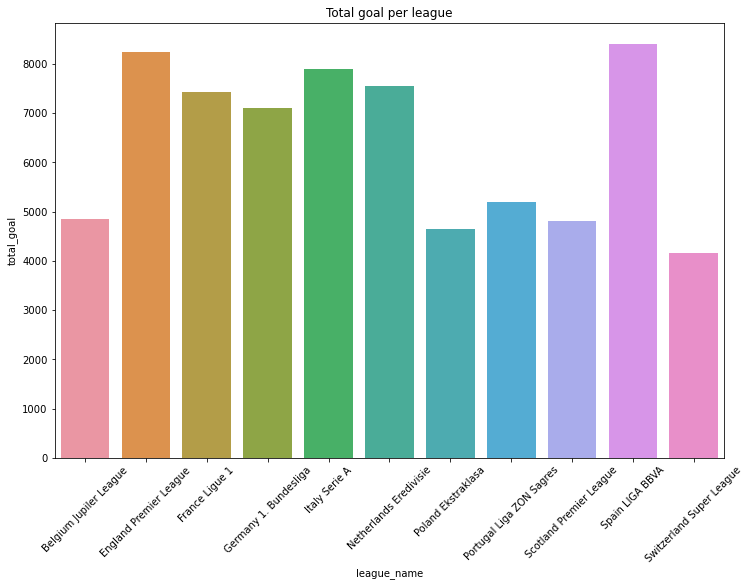

In [10]:
import seaborn
import matplotlib.pyplot as plt
df = total_goal_per_league
df['total_goal'] = df['total_home_goal'] + df['total_away_goal']
plt.figure(figsize=(12, 8))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Total goal per league")
plot = seaborn.barplot(x='league_name', y='total_goal', data=df)
#plot.set_xticklabels(plot.get_xticklabels(),rotation=45)


## Câu hỏi 9: Liệt kê thông tin các đội từ bảng “Team”

In [11]:
# ĐIỀN CODE VÀO ĐÂY
teams = pd.read_sql('SELECT * FROM Team', conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


## Câu hỏi 10: Liệt kê 20 đội với số bàn thắng sân nhà cao nhất
- Sử dung câu lênh GROUP BY, LIMIT

In [12]:
# ĐIỀN CODE VÀO ĐÂY
number_of_row = 20
highest_home_goal = pd.read_sql(
    '''
        SELECT 
            sum(mt.home_team_goal) as 'total_home_goal',
            team.team_long_name as 'Team_name',
            team.team_short_name as 'Short_name'
        FROM Team team
        INNER JOIN Match mt on mt.home_team_api_id = team.team_api_id
        GROUP BY team.team_api_id
        ORDER BY total_home_goal DESC
        LIMIT({})
    '''.format(number_of_row), conn)
highest_home_goal

,total_home_goal,Team_name,Short_name
0,505,Real Madrid CF,REA
1,495,FC Barcelona,BAR
2,389,Celtic,CEL
3,382,FC Bayern Munich,BMU
4,370,PSV,PSV
5,365,Manchester City,MCI
6,360,Ajax,AJA
7,344,FC Basel,BAS
8,338,Manchester United,MUN
9,333,Chelsea,CHE


### Visualize total goal of top 20 FC on home_team_goal

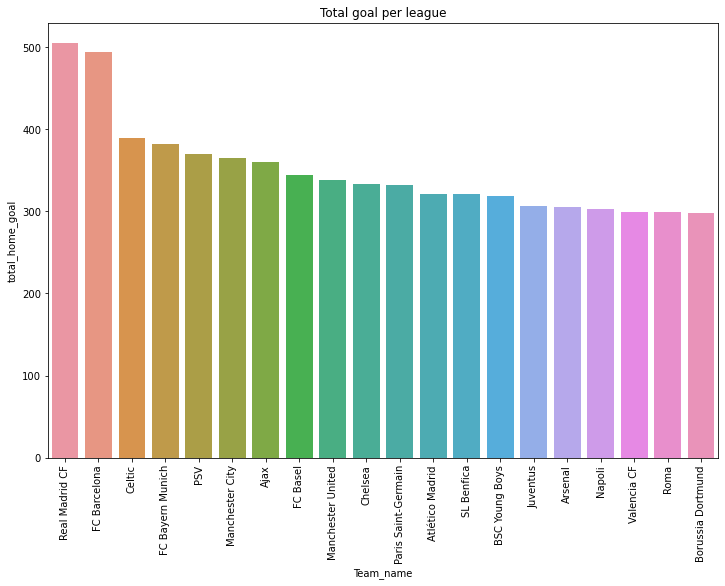

In [13]:
import seaborn
import matplotlib.pyplot as plt
df = highest_home_goal

plt.figure(figsize=(12, 8))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Total goal per league")
plot = seaborn.barplot(x='Team_name', y='total_home_goal', data=df)
#plot.set_xticklabels(plot.get_xticklabels(),rotation=45)


### Check data using pandas

In [14]:
results = pd.read_sql("SELECT * FROM Team where team_long_name = 'FC Barcelona'", conn)
results


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,43042,8634,241,FC Barcelona,BAR


In [15]:
matchs[matchs['home_team_api_id'] == 8634]['home_team_goal'].sum()

495

In [16]:
arr_home_goal = matchs.groupby(
                'home_team_api_id')['home_team_goal'].sum().values
arr_home_goal.sort()
arr_home_goal[::-1][:20]

array([505, 495, 389, 382, 370, 365, 360, 344, 338, 333, 332, 321, 321,
       319, 307, 306, 303, 299, 299, 298], dtype=int64)

## Câu hỏi 11: Liệt kê 20 đội có số bàn thắng trên sân khách cao nhất
- Sử dụng câu lênh GROUP BY, LIMIT

In [17]:
# ĐIỀN CODE VÀO ĐÂY
highest_away_goal = pd.read_sql(
    '''
        SELECT 
            sum(mt.away_team_goal) as 'total_away_goal',
            team.team_long_name as 'Team_name',
            team.team_short_name as 'Short_name'
        FROM Team team
        INNER JOIN Match mt on mt.away_team_api_id = team.team_api_id
        GROUP BY team.team_api_id
        ORDER BY total_away_goal DESC
        LIMIT(20)
    ''', conn)
highest_away_goal

,total_away_goal,Team_name,Short_name
0,354,FC Barcelona,BAR
1,338,Real Madrid CF,REA
2,306,Celtic,CEL
3,287,Ajax,AJA
4,282,PSV,PSV
5,275,FC Basel,BAS
6,271,FC Bayern Munich,BMU
7,267,Arsenal,ARS
8,253,Borussia Dortmund,DOR
9,250,Chelsea,CHE


## Câu hỏi 12: Liệt kê tên các đội bóng và tổng số bàn thắng mỗi đội, sắp xếp  theo số lượng giảm dần

- Tổng số bàn thắng của một đội bao gồm cả số bàn thắng ở sân nhà và sân khách.
- Sử dụng câu lệnh Union  

In [18]:
# ĐIỀN CODE VÀO ĐÂY
sum_of_goal_team = pd.read_sql(
    '''
        SELECT ((sum(total_home_goal) + sum(total_away_goal))/2) as 'total_goal',
                Team_name
        FROM(
                SELECT 
                    sum(mt.away_team_goal) as 'total_home_goal',
                    sum(mt.away_team_goal) as 'total_away_goal',
                    team.team_long_name as 'Team_name',
                    team.team_short_name as 'Short_name'
                FROM Team team
                INNER JOIN Match mt on mt.away_team_api_id = team.team_api_id
           
                GROUP BY team.team_long_name
                UNION
                SELECT 
                    sum(mt1.home_team_goal) as 'total_home_goal',
                    sum(mt1.home_team_goal) as 'total_away_goal',
                    team1.team_long_name as 'Team_name',
                    team1.team_short_name as 'Short_name'
                FROM Team team1
                INNER JOIN Match mt1 on mt1.home_team_api_id = team1.team_api_id
              
                GROUP BY team1.team_long_name

            )
        GROUP BY Team_name
        ORDER BY total_goal DESC
    ''', conn)
sum_of_goal_team

,total_goal,Team_name
0,849,FC Barcelona
1,843,Real Madrid CF
2,695,Celtic
3,653,FC Bayern Munich
4,652,PSV
...,...,...
291,22,Córdoba CF
292,21,AC Arles-Avignon
293,20,Watford
294,20,Angers SCO


## Câu hỏi 13: Liệt kê tên các đội bóng (long name) và tổng số trận đấu đội đó tham gia, sắp xếp theo thứ tự giảm dần.

In [19]:
# ĐIỀN CODE VÀO ĐÂY
total_match_of_team = pd.read_sql(
    '''
        SELECT team_long_name as 'team_name',
                count(*) as 'total_matchs'
        FROM Team team, Match match
        WHERE team.team_api_id 
            IN (match.home_team_api_id, match.away_team_api_id)
        GROUP BY team.team_api_id
        ORDER BY total_matchs DESC
        
    ''', conn)
total_match_of_team

,team_name,total_matchs
0,Valencia CF,304
1,Manchester United,304
2,Aston Villa,304
3,Stoke City,304
4,Toulouse FC,304
...,...,...
294,Amadora,30
295,Portimonense,30
296,Trofense,30
297,KAS Eupen,30


## Câu hỏi 14: Liệt kê số trận thắng, thua và hòa của mỗi đội.

- Nếu một đội có số lượng bàn thắng trên sân nhà > số lượng bàn thắng trên sân khách của chính đội đó, thì đội đó sẽ "thắng" trong trận đấu này
- Nếu một đội có số lượng bàn thắng trên sân nhà < số lượng bàn thắng trên sân khách của chính đội đó, thì đội đó sẽ "thua" trong trận đấu này
- Nếu một đội có số lượng bàn thắng trên sân nhà = số lượng bàn thắng trên sân khách của chính đội đó, thì đội đó sẽ "hòa" trong trận đấu này
- Sử dụng câu lệnh "Case When"


In [20]:
# ĐIỀN CODE VÀO ĐÂY
statistic_match = pd.read_sql(
    '''
        SELECT 
            team.team_long_name as 'team_name',
            sum(CASE WHEN home_team_goal > away_team_goal THEN 1 ELSE 0 END) as 'total_win',
            sum(CASE WHEN home_team_goal < away_team_goal THEN 1 ELSE 0 END) as 'total_lost',
            sum(CASE WHEN home_team_goal = away_team_goal THEN 1 ELSE 0 END) as 'total_draw'
        FROM Team team
        INNER JOIN Match match 
            on match.home_team_api_id = team.team_api_id
        GROUP BY team.team_long_name 
        ORDER BY Total_win DESC
    ''', conn)
statistic_match

,team_name,total_win,total_lost,total_draw
0,FC Barcelona,131,9,12
1,Real Madrid CF,129,12,11
2,Celtic,120,9,23
3,Manchester United,116,20,16
4,Manchester City,113,21,18
...,...,...,...,...
291,DSC Arminia Bielefeld,2,7,8
292,AC Arles-Avignon,2,11,6
293,Dunfermline Athletic,1,11,7
294,Córdoba CF,1,12,6


In [21]:
barsa_fc = matchs[matchs['home_team_api_id'] == 8634]
total_win_barsa = barsa_fc[barsa_fc['home_team_goal'] > barsa_fc['away_team_goal']].shape[0]
total_win_barsa

131

## Câu hỏi 15: Liệt kê 10 đội có số trận thắng nhiều nhất

In [22]:
# ĐIỀN CODE VÀO ĐÂY
top = 10
highest_win_match = pd.read_sql(
    '''
        SELECT 
            team.team_long_name as 'team_name',
            sum(CASE WHEN home_team_goal > away_team_goal THEN 1 ELSE 0 END) as 'total_win',
            sum(CASE WHEN home_team_goal < away_team_goal THEN 1 ELSE 0 END) as 'total_lost',
            sum(CASE WHEN home_team_goal = away_team_goal THEN 1 ELSE 0 END) as 'total_draw'
        FROM Team team, Match match 
        WHERE match.home_team_api_id = team.team_api_id
        GROUP BY team.team_long_name 
        ORDER BY Total_win DESC
        LIMIT {0};
    '''.format(top), conn)

statistic_match[:top]

,team_name,total_win,total_lost,total_draw
0,FC Barcelona,131,9,12
1,Real Madrid CF,129,12,11
2,Celtic,120,9,23
3,Manchester United,116,20,16
4,Manchester City,113,21,18
5,FC Bayern Munich,109,13,14
6,PSV,105,13,18
7,Juventus,105,16,30
8,FC Basel,103,14,26
9,Atlético Madrid,103,25,24


## Câu hỏi 16: Liệt kê tỉ lệ phần trăm về số trận của mỗi giải trên tổng tất cả các trận

In [23]:
# ĐIỀN CODE VÀO ĐÂY
percetage_matchs = pd.read_sql(
    '''
        SELECT 
            lg.name as 'league_name',
            ROUND
            (
                (
                    CAST(count(match.league_id)*100 as float) / 
                    (SELECT count(*) from Match)
                ), 3
            )
            as 'percentage_match'
        FROM Match match
        INNER JOIN League lg on lg.id = match.league_id
        GROUP BY lg.id
    ''', conn)
percetage_matchs

,league_name,percentage_match
0,Belgium Jupiler League,6.652
1,England Premier League,11.702
2,France Ligue 1,11.702
3,Germany 1. Bundesliga,9.423
4,Italy Serie A,11.613
5,Netherlands Eredivisie,9.423
6,Poland Ekstraklasa,7.391
7,Portugal Liga ZON Sagres,7.899
8,Scotland Premier League,7.021
9,Spain LIGA BBVA,11.702


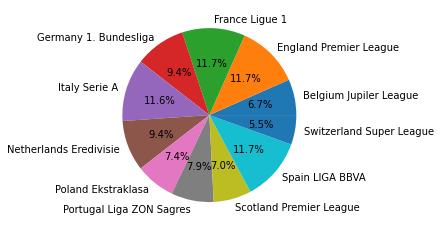

In [24]:
import matplotlib.pyplot as plt
plt.pie(percetage_matchs['percentage_match'], labels=percetage_matchs['league_name'], autopct='%.1f%%')

plt.show()

## Câu hỏi 17: Liệt kê tỉ lệ phần trăm về số bàn ghi được của từng giải so với tổng số bàn của tất cả các trận.

In [25]:
# ĐIỀN CODE VÀO ĐÂY
percetage_score_per_league = pd.read_sql(
    '''
        SELECT 
            League_name, 
            ROUND((CAST(total_goal * 100 as float) / (
                SELECT 
                    (sum(home_team_goal) + sum(away_team_goal)) 
                FROM Match)), 2) as percentage_score
        FROM (
            SELECT 
                lg.name as 'League_name',
                (sum(mt.home_team_goal) + sum(mt.away_team_goal)) as 'total_goal'
            FROM League lg
            INNER JOIN Match mt 
                on mt.league_id = lg.id 
            GROUP BY lg.id
            ORDER BY total_goal DESC
        )
        GROUP BY League_name
    ''', conn)
percetage_score_per_league

,League_name,percentage_score
0,Belgium Jupiler League,6.89
1,England Premier League,11.72
2,France Ligue 1,10.57
3,Germany 1. Bundesliga,10.11
4,Italy Serie A,11.23
5,Netherlands Eredivisie,10.73
6,Poland Ekstraklasa,6.62
7,Portugal Liga ZON Sagres,7.40
8,Scotland Premier League,6.83
9,Spain LIGA BBVA,11.97


## Câu hỏi 18: Liệt kê tổng số bàn ghi được của từng giải đấu theo từng mùa giải.

In [26]:
# ĐIỀN CODE VÀO ĐÂY
total_goal_per_season = pd.read_sql(
    '''
        SELECT 
            lg.name as 'League_name',
            mt.season,
            (sum(mt.home_team_goal) + sum(mt.away_team_goal)) as 'total_goal'
        FROM League lg
        INNER JOIN Match mt 
            on mt.league_id = lg.id 
        GROUP BY lg.name, mt.season
    ''', conn)
total_goal_per_season

,League_name,season,total_goal
0,Belgium Jupiler League,2008/2009,855
1,Belgium Jupiler League,2009/2010,565
2,Belgium Jupiler League,2010/2011,635
3,Belgium Jupiler League,2011/2012,691
4,Belgium Jupiler League,2012/2013,703
...,...,...,...
83,Switzerland Super League,2011/2012,425
84,Switzerland Super League,2012/2013,462
85,Switzerland Super League,2013/2014,520
86,Switzerland Super League,2014/2015,517


## Câu hỏi 19: Liệt kê thông tin cầu thủ:

- Quy đổi cân nặng sang kilogram
- Quy đổi chiều cao sang mét
- Tính chỉ số bmi = ( (weight* 0.453592) / (height/100)^2)
- Tính tuổi của cầu thủ

In [27]:
# ĐIỀN CODE VÀO ĐÂY
#now = '2016-02-29'
now = 'now'
players = pd.read_sql(
    '''
        SELECT 
            player.player_name,
            ROUND(weight*0.453592,2) as 'weight (kg)',
            ROUND(height/100, 2) as 'height (m)',
            ROUND(((weight*0.453592) / ((height/100)*2)),2) as 'bmi',
            CAST(strftime('%Y.%m%d', '{}') - strftime('%Y.%m%d', birthday) as int) as age
            
        FROM Player_Attributes player_att
        INNER JOIN Player player 
            on player.player_api_id = player_att.player_api_id
    '''.format(now), conn)
players

,player_name,weight (kg),height (m),bmi,age
0,Aaron Appindangoye,84.82,1.83,23.19,30
1,Aaron Appindangoye,84.82,1.83,23.19,30
2,Aaron Appindangoye,84.82,1.83,23.19,30
3,Aaron Appindangoye,84.82,1.83,23.19,30
4,Aaron Appindangoye,84.82,1.83,23.19,30
...,...,...,...,...,...
183973,Zvjezdan Misimovic,79.83,1.80,22.13,40
183974,Zvjezdan Misimovic,79.83,1.80,22.13,40
183975,Zvjezdan Misimovic,79.83,1.80,22.13,40
183976,Zvjezdan Misimovic,79.83,1.80,22.13,40


## Câu hỏi 20: Liệt kê cầu thủ lớn tuổi nhất

In [28]:
# ĐIỀN CODE VÀO ĐÂY
now = 'now'
oldest_players = pd.read_sql(
    '''
        SELECT 
            player.player_api_id,
            player.player_name,
            player.player_fifa_api_id,
            ROUND(weight*0.453592,2) as 'weight (kg)',
            ROUND(height/100, 2) as 'height (m)',
            ROUND(((weight*0.453592) / ((height/100)*2)),2) as 'bmi',
            MAX(CAST(strftime('%Y.%m%d', '{}') - strftime('%Y.%m%d', birthday) as int)) as age
        FROM Player_Attributes player_att
        INNER JOIN Player player 
            on player.player_api_id = player_att.player_api_id
    '''.format(now), conn)
oldest_players

,player_api_id,player_name,player_fifa_api_id,weight (kg),height (m),bmi,age
0,39425,Alberto Fontana,2431,73.03,1.85,19.69,55


In [29]:
top_oldest = 4
oldest_players = pd.read_sql(
    '''
        SELECT * FROM Player ORDER BY birthday LIMIT {}
    '''.format(top_oldest), conn)
oldest_players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,290,39425,Alberto Fontana,2431,1967-01-23 00:00:00,185.42,161
1,8296,26099,Paolo Maldini,1109,1968-06-26 00:00:00,185.42,187
2,9007,26576,Rob van Dijk,15708,1969-01-15 00:00:00,187.96,183
3,6245,27666,Luca Bucci,12514,1969-03-13 00:00:00,180.34,174


## Câu hỏi 21: Liệt kê  cầu thủ có số trận đấu nhiều nhất

In [30]:
# ĐIỀN CODE VÀO ĐÂY
player_highest_matchs = pd.read_sql(
    '''
        SELECT 
            player_id,
            player_name,
            player_fifa_api_id,
            birthday,
            height,
            weight,
            MAX(total_matchs) as 'total_matchs'
        FROM (
            SELECT 
                player.player_api_id as 'player_id',
                player.player_name,
                player.player_fifa_api_id,
                player.birthday,
                player.height,
                player.weight,
                count(player.player_api_id) as 'total_matchs'
            FROM Player player, Match match
            WHERE 
                (player.player_api_id = match.home_player_X1)
                or (player.player_api_id = match.home_player_X2)
                or (player.player_api_id = match.home_player_X3)
                or (player.player_api_id = match.home_player_X4)
                or (player.player_api_id = match.home_player_X5)
                or (player.player_api_id = match.home_player_X6)
                or (player.player_api_id = match.home_player_X7)
                or (player.player_api_id = match.home_player_X8)
                or (player.player_api_id = match.home_player_X9)
                or (player.player_api_id = match.home_player_X10)
                or (player.player_api_id = match.home_player_X11)
                
                or (player.player_api_id = match.away_player_X1)
                or (player.player_api_id = match.away_player_X2)
                or (player.player_api_id = match.away_player_X3)
                or (player.player_api_id = match.away_player_X4)
                or (player.player_api_id = match.away_player_X5)
                or (player.player_api_id = match.away_player_X6)
                or (player.player_api_id = match.away_player_X7)
                or (player.player_api_id = match.away_player_X8)
                or (player.player_api_id = match.away_player_X9)
                or (player.player_api_id = match.away_player_X10)
                or (player.player_api_id = match.away_player_X11)
                
            GROUP BY player.player_api_id
            ORDER BY total_matchs
        )
        
    ''', conn)

player_highest_matchs

,player_id,player_name,player_fifa_api_id,birthday,height,weight,total_matchs
0,None,None,None,None,None,None,None


## Câu hỏi 22: Liệt kê các cầu thủ có tổng số điểm đánh giá lớn hơn 80

In [31]:
# ĐIỀN CODE VÀO ĐÂY
rating_larger_80 = pd.read_sql(
    '''
        SELECT max(overall_rating) as 'max_score', * 
        FROM Player p
        INNER JOIN Player_Attributes p_att
            on p.player_api_id = p_att.player_api_id
        WHERE overall_rating > 80
        GROUP BY p_att.player_api_id
        ORDER BY max_score DESC
    ''', conn)
rating_larger_80

,max_score,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,94,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,102483,158023,30981,2015-12-17 00:00:00,94,94,left,medium,low,80,93,71,88,85.0,96,89.0,90,79,96,95,90,92.0,92,95.0,80,68.0,75,59,88,48,22,90,90.0,74,13,23,21.0,6,11,15,14,8
1,93,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,33331,20801,30893,2015-10-16 00:00:00,93,93,right,high,low,82,95,86,81,87.0,93,88.0,77,72,91,91,93,90.0,92,62.0,94,94.0,90,79,93,62,29,93,81.0,85,22,31,23.0,7,11,15,14,11
2,93,10749,30829,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183,178976,54050,30829,2007-02-22 00:00:00,93,93,right,high,high,74,93,61,83,89.0,90,81.0,80,71,90,92,90,80.0,89,89.0,95,79.0,92,90,92,94,78,83,88.0,80,28,42,41.0,11,7,71,11,12
3,93,3826,30717,Gianluigi Buffon,1179,1978-01-28 00:00:00,193.04,201,63876,1179,30717,2007-02-22 00:00:00,93,93,right,medium,medium,9,10,8,23,7.0,9,8.0,88,76,22,62,44,65.0,89,67.0,24,75.0,56,83,9,81,90,14,70.0,88,8,8,9.0,91,93,76,96,93
4,92,3994,39989,Gregory Coupet,1747,1972-12-31 00:00:00,180.34,176,66758,1747,39989,2007-02-22 00:00:00,92,93,right,y,es,11,2,12,28,9.0,9,10.0,80,82,28,55,62,33.0,84,55.0,22,72.0,72,89,5,88,18,25,51.0,80,8,13,12.0,93,91,82,93,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,81,6537,23686,Manuel Almunia,113343,1977-05-19 00:00:00,193.04,205,108718,113343,23686,2009-08-30 00:00:00,81,83,right,medium,medium,22,22,22,22,10.0,22,11.0,8,77,22,40,52,48.0,74,60.0,25,75.0,63,83,22,67,52,45,25.0,48,22,22,18.0,86,81,77,73,86
835,81,2246,23271,Danny Webber,119814,1981-12-28 00:00:00,175.26,159,37658,119814,23271,2007-02-22 00:00:00,81,85,right,medium,low,57,85,52,61,62.0,78,65.0,68,54,78,82,82,72.0,72,73.0,81,57.0,75,64,84,47,58,67,59.0,68,23,41,25.0,7,5,54,14,10
836,81,2216,19249,Danilo,166072,1984-05-10 00:00:00,185.42,165,37123,166072,19249,2013-05-31 00:00:00,81,82,right,low,medium,48,33,79,67,38.0,54,34.0,43,69,70,55,50,44.0,78,60.0,72,78.0,70,80,56,80,85,29,53.0,61,85,88,82.0,11,8,11,5,6
837,81,1232,11319,Benoit Costil,158121,1987-07-03 00:00:00,187.96,190,20868,158121,11319,2015-11-12 00:00:00,81,81,right,medium,medium,11,14,15,35,12.0,13,12.0,11,33,12,49,53,38.0,77,45.0,22,49.0,28,65,15,22,22,12,44.0,15,16,11,14.0,82,80,78,82,85
